<a href="https://colab.research.google.com/github/Shrzzzz/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [5]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.shape

(2290, 6)

In [8]:
#getting some basic info on the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correaltion in data

In [11]:
#converting the 'Date' column to datetime objects
gold_data['Date']=pd.to_datetime(gold_data['Date'])


#calculating the correlation
correlation= gold_data.corr()

<Axes: >

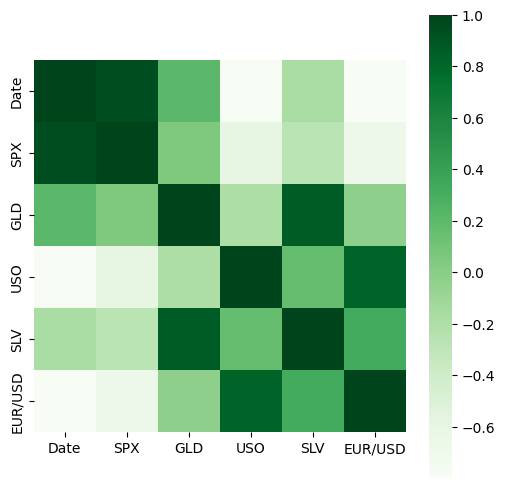

In [12]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot_kws={'size':6}, cmap='Greens')

In [13]:
#correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-ebecaee9c32d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

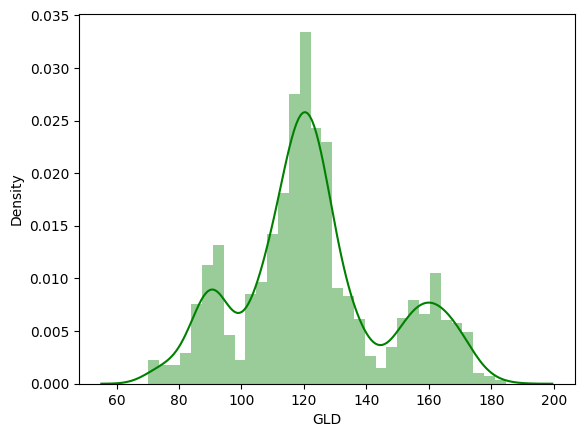

In [14]:
#checking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [15]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [16]:
print (X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and testing data

In [18]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model training: Random Forest Regressor

In [19]:
regressor= RandomForestRegressor(n_estimators=100)


In [20]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
# prediction on test data
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.50149949  81.95959974 116.26059994 127.3710009  120.64670096
 154.67559813 150.23839869 126.10550009 117.45139868 126.0183007
 116.76570101 172.59160063 141.94349887 167.81719856 115.1831002
 117.76250046 139.12250292 169.80269999 159.15410274 156.98200091
 155.16550013 125.21380028 176.53959923 157.26470307 125.23090053
  93.79089966  77.28660033 120.49209997 119.14819929 167.45529999
  88.10850049 125.23750016  91.16770081 117.67489995 121.08429909
 135.77150062 115.32720121 115.15920074 146.94489882 107.38910105
 104.49150251  87.1835978  126.54580044 117.98980002 154.64649883
 119.57300004 108.42109962 107.95419826  93.25580074 127.10109746
  75.43960008 113.58479934 121.2934     111.3185992  118.80299898
 120.57429946 158.80660069 166.8979019  146.84259719  85.60009868
  94.24470032  86.70619872  90.54600028 119.19130042 126.45990068
 127.47730009 170.11260031 122.25039938 117.37259914  98.33600022
 167.94450048 142.67579795 131.8391029  121.19190212 121.04539937
 119.6755005

In [22]:
# R squared error
error_score= metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9887702728477147


Compare the actual values and predicted values in a plot

In [23]:
Y_test= list(Y_test)

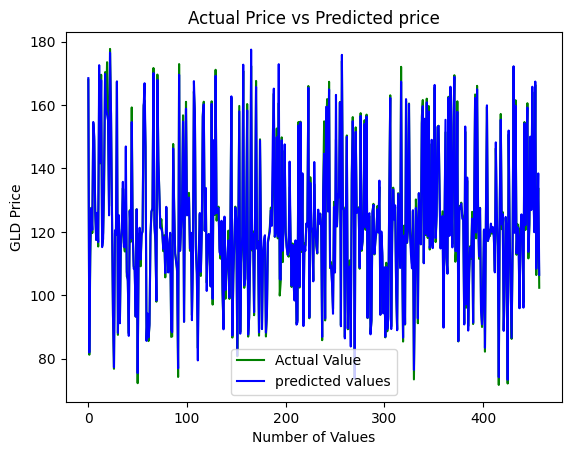

In [24]:
plt.plot(Y_test, color='green', label='Actual Value')
plt.plot(test_data_prediction, color='blue',label='predicted values')
plt.title('Actual Price vs Predicted price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

